# Iris flower

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

使用 iris dataset. 只使用 sepal length, petal length, and target 欄位. 只使用 setosa and versicolor

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print('target_names:' + str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data = iris_data[iris_data['target'].isin([0, 1])]
iris_data.head()

target_names:['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


將資料分成 train 和 test 兩組

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']],
                                                    iris_data[['target']],
                                                    test_size=0.3, random_state=0)

In [5]:
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(type(X_train), type(X_test), type(y_train), type(y_test))

70 30 70 30
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [6]:
#X_train
#X_test
#y_train
#y_test
#y_train.values
y_train['target'].values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

使用 Logistic regression 之前，先要對特徵資料做縮放

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
#X_train_std
#type(X_train_std)
#X_test_std
#type(X_test_std)

In [9]:
from IPython.display import Math
Math(r'z=w^Tx')

<IPython.core.display.Math object>

In [10]:
Math(r'\phi(z) = \frac{1}{1+e^{-z}}')

<IPython.core.display.Math object>

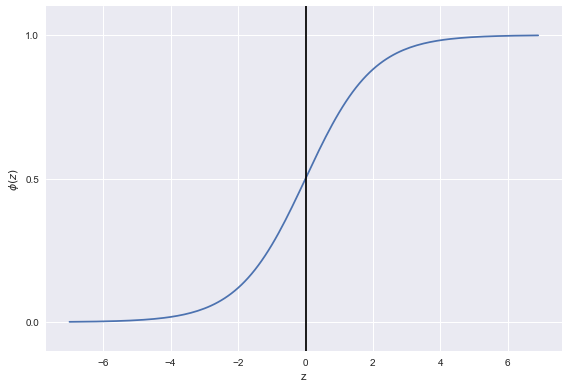

In [11]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.style.use('seaborn')
plt.plot(z, phi_z)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.axvline(0.0, color='k') # 畫 z=0 的線
plt.tight_layout()
plt.show()

開始訓練

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train['target'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

畫圖

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 決定圖片的 x 軸上下限
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # 決定圖片的 y 軸上下限
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 建立格子點
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # reval() 是把高維度降成一維，新的陣列是個 2 row 的陣列
    # 但是我們要把 xx1 的元素放在第一欄 xx2 放在第二欄，所以要轉置
    # Z 只是每個格子點用分類器預測出來的結果
    Z = Z.reshape(xx1.shape) # 恢復成原本的維度
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 會畫出一條線，將平面切割成兩個區域
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): # 先畫出所有 y=0 的點，再畫出所有 y=1 的點
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

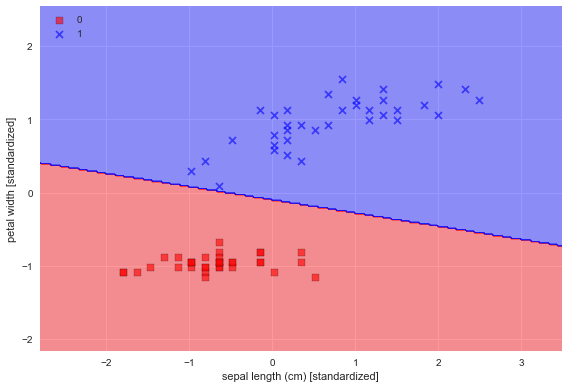

In [14]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=lr)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

用測試資料來看預測結果

In [15]:
lr.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

真正的結果

In [16]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

比較預測的結果和真正的結果

In [17]:
error = 0
for i, v in enumerate(lr.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


查看預測的機率，第一個元素是預測是 A 類的機率，第二個元素是預測是 B 類的機率，P(A)+P(B)=1

In [18]:
lr.predict_proba(X_test_std)

array([[0.93978177, 0.06021823],
       [0.005938  , 0.994062  ],
       [0.97412756, 0.02587244],
       [0.0212674 , 0.9787326 ],
       [0.0119407 , 0.9880593 ],
       [0.32159479, 0.67840521],
       [0.95312111, 0.04687889],
       [0.0100283 , 0.9899717 ],
       [0.00867294, 0.99132706],
       [0.03869904, 0.96130096],
       [0.06752495, 0.93247505],
       [0.05267873, 0.94732127],
       [0.01641248, 0.98358752],
       [0.98776985, 0.01223015],
       [0.95041495, 0.04958505],
       [0.94900694, 0.05099306],
       [0.98704203, 0.01295797],
       [0.9094647 , 0.0905353 ],
       [0.93811592, 0.06188408],
       [0.97556281, 0.02443719],
       [0.93978177, 0.06021823],
       [0.04455382, 0.95544618],
       [0.96461079, 0.03538921],
       [0.04095329, 0.95904671],
       [0.96560356, 0.03439644],
       [0.93638206, 0.06361794],
       [0.97099504, 0.02900496],
       [0.04711351, 0.95288649],
       [0.06393071, 0.93606929],
       [0.00443408, 0.99556592]])